## Testing manual scoring on 2 short strings

In [10]:
s1 = "Testing locality sensitive hashing using deep learning"
s2 = "Hashing variables with locality using reinforcement learning"

### Shingle Scoring using unigrams (Jaccard scores)

In [11]:
def shingleScoreSimple(s1, s2):
    s1 = s1.lower().split()
    s2 = s2.lower().split()
    return (len(list(set(s1).intersection(s2))))/(len(set(s1))+len(set(s2)))

In [12]:
shingleScoreSimple(s1,s2)

0.2857142857142857

### Shingle Scoring using k shingles (of size 3)

In [13]:
def splitShingle(s, k):
    shingles = []
    for i in range(len(s)-k):
        shingles.append(s[i:i+k])
    return shingles

def shingleScore(s1, s2, k):
    s1 = s1.lower()
    s2 = s2.lower()
    shingle1 = splitShingle(s1, k)
    shingle2 = splitShingle(s2, k)
    return (len(list(set(shingle1).intersection(shingle2))))/(len(set(shingle1))+len(set(shingle2)))

In [14]:
shingleScore(s1, s2, 3)

0.22549019607843138

## Data Testing

In [5]:
import numpy as np
import pandas as pd
import re
from datasketch import MinHash, MinHashLSHForest
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("/Users/siddharthjain/Downloads/papers.csv")
df.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [18]:
df.shape

(7241, 7)

In [19]:
df[df['abstract']=="Abstract Missing"].shape

(3317, 7)

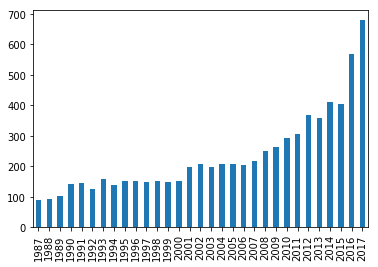

In [20]:
df.year.value_counts().sort_index().plot(kind='bar')

## Clean unigrams function

In [21]:
def preprocess(text):
    text = re.sub(r'[^\w\s]','',text)
    tokens = text.lower()
    tokens = tokens.split()
    return tokens

In [24]:
tokens = preprocess(s1)
tokens

['testing', 'locality', 'sensitive', 'hashing', 'using', 'deep', 'learning']

## Functions for prediction

Creating a new column containing title and paper text for our model

In [25]:
df['text'] = df['title'] + ' ' + df['paper_text']

#### Function to create a forest

In [28]:
def makeForest(data):
    minhash = []
    
    for paper in data['text']:
        m = MinHash(num_perm = 32)
        shingles = preprocess(paper)
        for gram in shingles:
            m.update(gram.encode('utf-8'))
        minhash.append(m)
    
    forest = MinHashLSHForest(num_perm = 32)
    
    for i, h in enumerate(minhash):
        forest.add(i, h)
        
    # Making keys query-able    
    forest.index()
    
    return forest

#### Function to recommend based on a paper and its data

In [29]:
def predict(s, data, num_results, forest):
    shingles = preprocess(s)
    m = MinHash(num_perm = 32)
    for gram in shingles:
        m.update(gram.encode('utf-8'))
    
    indexes = np.array(forest.query(m, num_results))
    
    if len(indexes) == 0:
        return None
    
    result = data.iloc[indexes]['title']
    
    return result

Using only the first 2000 rows to reduce processing time (time consuming since we are using the entire article text)

In [30]:
forest = makeForest(df.head(2000))

In [37]:
sample = df.iloc[42]
s = sample['title']+' '+sample['text']
print(sample['title'])

Improved Gaussian Mixture Density Estimates Using Bayesian Penalty Terms and Network Averaging


#### These predictions are based on article title and text

In [40]:
res = predict(s, df, 3, forest)

In [41]:
for i in res:
    print(i)

Extracting Tree-Structured Representations of Trained Networks
Improved Gaussian Mixture Density Estimates Using Bayesian Penalty Terms and Network Averaging
Emergence of Topography and Complex Cell Properties from Natural Images using Extensions of ICA


## LSH Library (painful)

In [1]:
from LocalitySensitiveHashing import *

In [18]:
lsh = LocalitySensitiveHashing(
                   datafile = "Iris2.csv",
                   dim = 6,
                   r = 50,            
                   b = 100,              
                   expected_num_of_clusters = 3,
              )
lsh.get_data_from_csv()
lsh.initialize_hash_store()
lsh.hash_all_data()
similarity_groups = lsh.lsh_basic_for_neighborhood_clusters()
coalesced_similarity_groups = lsh.merge_similarity_groups_with_coalescence( similarity_groups )
merged_similarity_groups = lsh.merge_similarity_groups_with_l2norm_sample_based( coalesced_similarity_groups )
# lsh.write_clusters_to_file( merged_similarity_groups, "clusters.txt" )

ValueError: data type must provide an itemsize

In [ ]:
lsh.write_clusters_to_file( merged_similarity_groups, "clustersSample.txt" )

In [7]:
df = pd.read_csv("data_for_lsh.csv")

In [8]:
df.head()

,sample0_0,1.069,0.018,-0.006,-0.116,0.024,-0.011,-0.086,-0.131,0.1,-0.036
0,sample0_1,0.944,0.089,-0.075,0.039,-0.095,0.081,-0.010,-0.053,0.120,-0.019
1,sample0_2,1.009,-0.085,-0.033,0.031,0.061,-0.169,0.026,-0.069,0.112,-0.186
2,sample0_3,1.200,0.193,-0.058,-0.011,-0.071,-0.051,-0.058,0.065,0.092,0.034
3,sample0_4,1.081,0.235,-0.080,0.121,0.163,0.002,-0.125,0.085,-0.167,0.032
4,sample0_5,0.967,-0.121,0.058,-0.100,0.088,-0.037,0.151,0.097,0.097,-0.039


In [30]:
df = pd.read_csv("Iris.csv")
df = df.drop(['Species'], axis = 1)
# df = np.array(df,dtype=float)
x = 0
for index, row in df.iterrows():
    print('x')
    print(" ".join((str(x), "_sample")))
#     df.set_value(index, 'Id', " ".join((str(x), "_sample")))
    x+=1
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [32]:
ind = []
for i in range(150):
    s = "sample0_"+str(i)
    ind.append(s)
df['sample0_0'] = ind
# print(df.head())
# df = df['sample0_0',1, 5.1, 3.5, 1.4, 0.2]
df.head()
# new_header = df.iloc[0] #grab the first row for the header
# df = df[1:] #take the data less the header row
# df.columns = new_header



# df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,sample0_0
0,1,5.1,3.5,1.4,0.2,sample0_0
1,2,4.9,3.0,1.4,0.2,sample0_1
2,3,4.7,3.2,1.3,0.2,sample0_2
3,4,4.6,3.1,1.5,0.2,sample0_3
4,5,5.0,3.6,1.4,0.2,sample0_4


In [16]:
df.to_csv("Iris2.csv")

In [25]:
pd.read_csv("Iris2.csv", index_col= 0)

,1.0,5.1,3.5,1.4,0.2
sample0_0,2,4.9,3.0,1.4,0.2
sample0_1,3,4.7,3.2,1.3,0.2
sample0_2,4,4.6,3.1,1.5,0.2
sample0_3,5,5.0,3.6,1.4,0.2
sample0_4,6,5.4,3.9,1.7,0.4
sample0_5,7,4.6,3.4,1.4,0.3
sample0_6,8,5.0,3.4,1.5,0.2
sample0_7,9,4.4,2.9,1.4,0.2
sample0_8,10,4.9,3.1,1.5,0.1
sample0_9,11,5.4,3.7,1.5,0.2


## Experimenting with test values

In [34]:
import random

In [33]:
items = ['Veg Pizza', 'Pepsi', 'Garlic Bread', 'Burger', 'Pasta', 'Paratha', 'Non Veg Pizza', 
         'Cheese dip', 'Thumbs up', 'Water', 'Taco', 'Nacho', 'French Fries', 'Cold coffee', 
         'Capuccino', 'Chocolate']
len(items)

16

In [43]:
users = []
for i in range(10):
    cart = []
    r = random.randint(2, 7)
    random.shuffle(items)
    cart.extend(items[0:r])
    users.append(cart)

In [44]:
users

[['Garlic Bread', 'Burger', 'Pasta'],
 ['Veg Pizza', 'Burger', 'Capuccino', 'Non Veg Pizza', 'Cold coffee'],
 ['Pasta', 'Chocolate'],
 ['Taco', 'French Fries', 'Pasta', 'Burger', 'Pepsi'],
 ['French Fries', 'Burger', 'Nacho', 'Cold coffee', 'Non Veg Pizza', 'Water'],
 ['Chocolate', 'Cold coffee', 'Nacho', 'Pasta'],
 ['Nacho', 'Water', 'Pepsi'],
 ['Water', 'Non Veg Pizza', 'Burger', 'Nacho'],
 ['Cheese dip', 'Non Veg Pizza', 'Garlic Bread', 'Capuccino', 'Veg Pizza'],
 ['Chocolate', 'Thumbs up', 'Capuccino', 'Cold coffee', 'Taco']]

In [49]:
itemuser = []
j = 0
for i in users:
    l = []
    for item in items:
        if item in i:
            l.append(1)
        else:
            l.append(0)
    itemuser.append(l)
itemuser

[[0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [58]:
itemusert = list(map(list, zip(*itemuser)))
itemusert

[[0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
 [0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 1, 0, 1, 1, 0, 0, 1, 0, 0],
 [1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 1, 0, 0, 1, 1, 0]]

In [80]:
from pandas import DataFrame
df = DataFrame.from_records(itemusert)
df.index = items
df

,0,1,2,3,4,5,6,7,8,9
Chocolate,0,0,1,0,0,1,0,0,0,1
Thumbs up,0,0,0,0,0,0,0,0,0,1
Capuccino,0,1,0,0,0,0,0,0,1,1
Cold coffee,0,1,0,0,1,1,0,0,0,1
Taco,0,0,0,1,0,0,0,0,0,1
Garlic Bread,1,0,0,0,0,0,0,0,1,0
Nacho,0,0,0,0,1,1,1,1,0,0
Cheese dip,0,0,0,0,0,0,0,0,1,0
Burger,1,1,0,1,1,0,0,1,0,0
Pasta,1,0,1,1,0,1,0,0,0,0


In [63]:
from sklearn.metrics import jaccard_similarity_score

In [84]:
jaccard_similarity_score(df[0], df[1])

0.625

This considers 0s, so instead using 1-hamming distance

In [85]:
from sklearn.metrics.pairwise import pairwise_distances

In [86]:
jac_sim = 1 - pairwise_distances(df.T, metric = "hamming")
jac_sim = pd.DataFrame(jac_sim, index=df.columns, columns=df.columns)

In [87]:
jac_sim

,0,1,2,3,4,5,6,7,8,9
0,1.0000,0.6250,0.8125,0.7500,0.5625,0.6875,0.6250,0.6875,0.6250,0.5000
1,0.6250,1.0000,0.5625,0.5000,0.6875,0.5625,0.5000,0.6875,0.7500,0.6250
2,0.8125,0.5625,1.0000,0.6875,0.5000,0.8750,0.6875,0.6250,0.5625,0.6875
3,0.7500,0.5000,0.6875,1.0000,0.5625,0.5625,0.6250,0.5625,0.3750,0.5000
4,0.5625,0.6875,0.5000,0.5625,1.0000,0.6250,0.6875,0.8750,0.4375,0.4375
5,0.6875,0.5625,0.8750,0.5625,0.6250,1.0000,0.6875,0.6250,0.4375,0.6875
6,0.6250,0.5000,0.6875,0.6250,0.6875,0.6875,1.0000,0.8125,0.5000,0.5000
7,0.6875,0.6875,0.6250,0.5625,0.8750,0.6250,0.8125,1.0000,0.5625,0.4375
8,0.6250,0.7500,0.5625,0.3750,0.4375,0.4375,0.5000,0.5625,1.0000,0.5000
9,0.5000,0.6250,0.6875,0.5000,0.4375,0.6875,0.5000,0.4375,0.5000,1.0000
